**Import required packages**

In [3]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

**Import data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset=pd.read_csv('drive/MyDrive/datasets/bank.csv')

**General Data exploration**

In [6]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
dataset.shape

(11162, 17)

In [ ]:
#11162 instances and 17 attributes

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# 1 step of data pre-processing

Missing values

In [10]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Fortunately,we have no missing values in this dataset

**Correlation matrix**

In [12]:
# Convert the columns Binary Columns into int
def convert_to_int(dataset, new_column, target_column):
    dataset[new_column] = dataset[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset[new_column].value_counts()

In [13]:
#convert deposit into int 
convert_to_int(dataset, "deposit_int", "deposit") #Create a deposit int

0    5873
1    5289
Name: deposit_int, dtype: int64

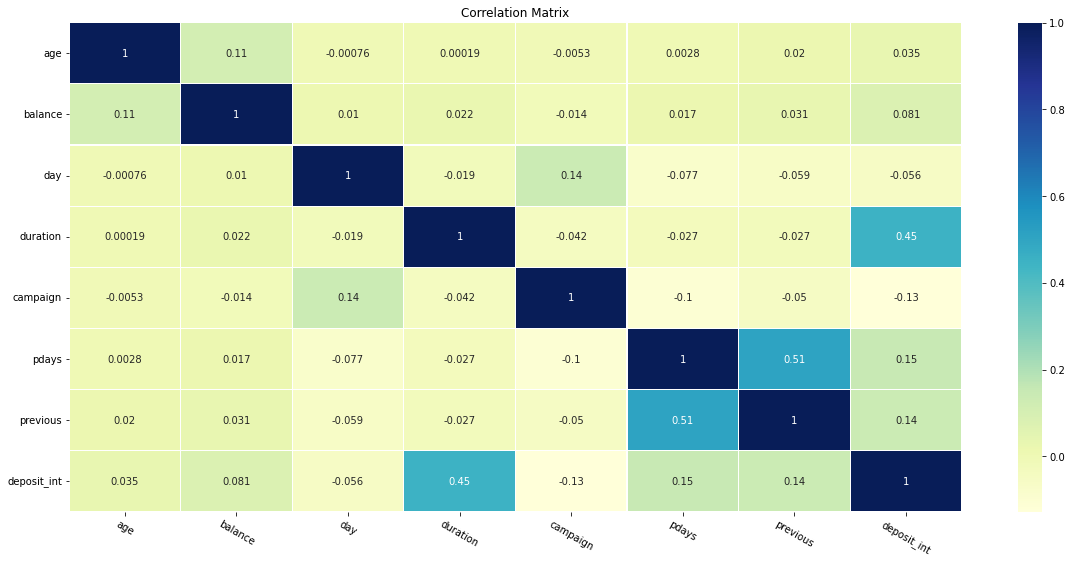

In [14]:
#plot correlation matrix
corr_matrix=dataset.corr()
cor_plot = sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,9)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Overall numerical features have very less correlation between them and Duration has the highst correlation with our target deposit

# Feature visualization and analysis

helper functions for visualization

In [18]:
colors=["#27AE60", "#FF3349"]

In [15]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [82]:
class data_visualization:
    
    def __init__(self, dataset):
        self.dataset = dataset
        self.raw_df_grouped = dataset.groupby("deposit")
        self.class_name_no = "no"
        self.class_name_yes = "yes"
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_hist_numerical(self,feature_name,bin_size):
        plt.hist(self.dataset[feature_name],bins=bin_size)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")
       
    def histogram_numerical(self, feature_name, bin_size):
        
        plt.figure(figsize=(20, 8))
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def histogram_categorical(self, feature_name):
        
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        feature_df.plot(kind='bar',figsize=(16,8),color=colors)
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()
    def plot_histogram(self, feature_name):
        g=sns.countplot(x=self.dataset[feature_name], data=self.dataset, hue=self.dataset['deposit'],palette=colors)
        barPerc(self.dataset,feature_name,g)  
        plt.title("Feature Histogram - "+feature_name)  
    def plot_categories(self,feature_name,feature_name1):
        sns.set(style="white")
        fig, ax = plt.subplots(figsize=(20,8))
        g3=sns.countplot(x=feature_name, data=self.dataset)
        title="Different " +feature_name1+" categories"
        x_label=feature_name1+" categories"
        ax.set_title(title, fontsize=20)
        ax.set_xlabel(x_label)
        total=float(len(dataset))
        for p in g3.patches:

          percentage = '{:.1f}%'.format(100 * p.get_height()/total)
          x = p.get_x() + p.get_width()
          y = p.get_height()
          ax.annotate(percentage, (x, y),ha='center')
        plt.show()

In [59]:
data_visualization=data_visualization(dataset)

**Data Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


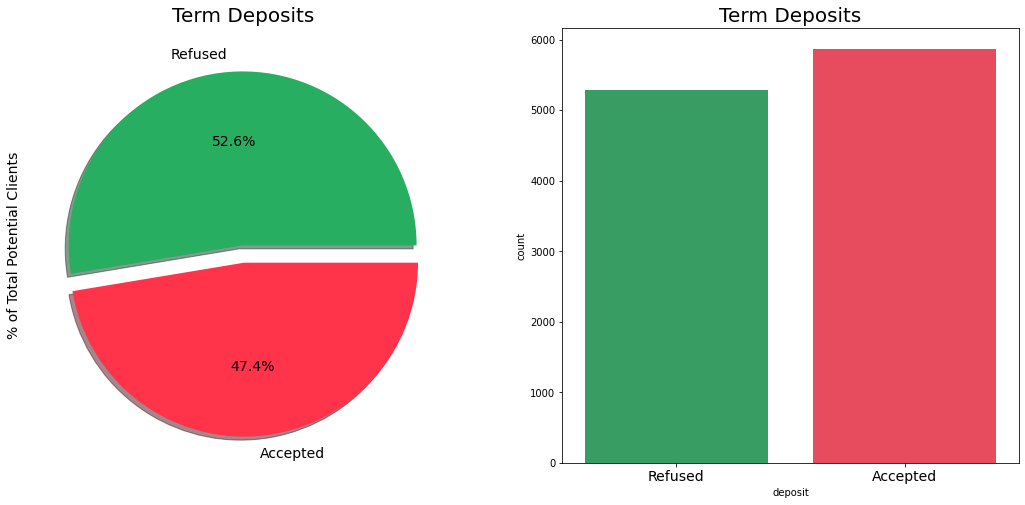

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'Refused', 'Accepted'
dataset['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('deposit',data=dataset,ax=ax[1], palette=colors)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Refused', 'Accepted'], fontsize=14)
plt.show()

**Client profile attributes**

Age attribute

No handles with labels found to put in legend.


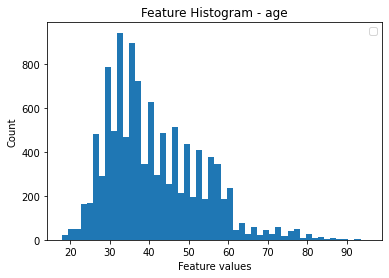

In [22]:
data_visualization.plot_hist_numerical("age",50)

In [23]:
#create age categories
l = [dataset]
for col in l:
    col.loc[col["age"] < 30,  "age_category"] = 20
    col.loc[(col["age"] >= 30) & (col["age"] <= 39), "age_category"] = 30
    col.loc[(col["age"] >= 40) & (col["age"] <= 49), "age_category"] = 40
    col.loc[(col["age"] >= 50) & (col["age"] <= 59), "age_category"] = 50
    col.loc[col["age"] >= 60, "age_category"] = 60
 
dataset['age_category'] = dataset['age_category'].astype(np.int64)


In [ ]:
data_visualization=data_visualization(dataset)

In [24]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_int,age_category
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1,50
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1,50
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1,40
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1,50
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1,50


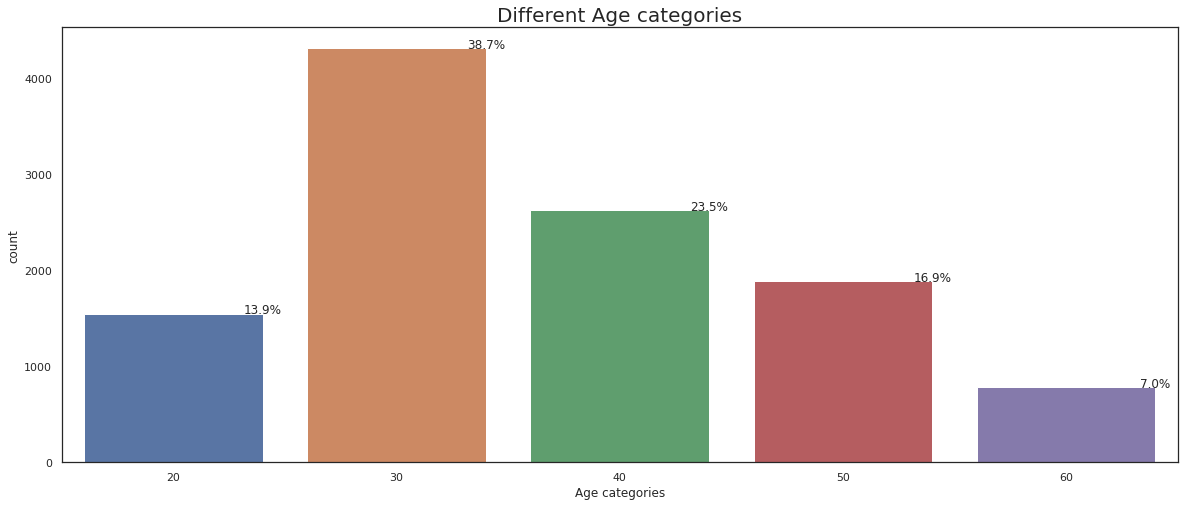

In [43]:
data_visualization.plot_categories("age_category","Age")

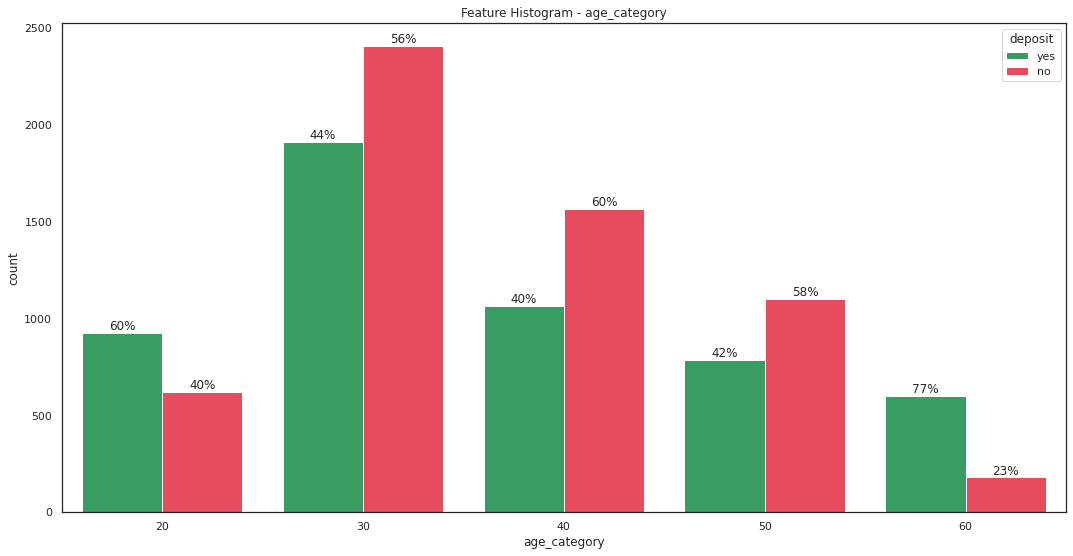

In [27]:
f2,ax2=plt.subplots(1,1,figsize=(18,9))
data_visualization.plot_histogram('age_category')

**Job attribute**

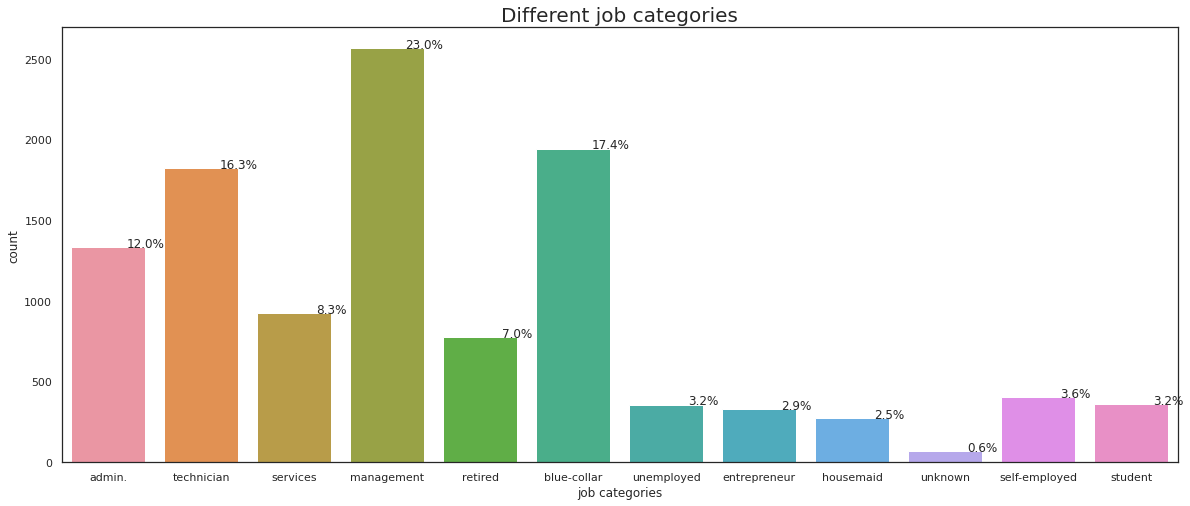

In [45]:
data_visualization.plot_categories("job","job")

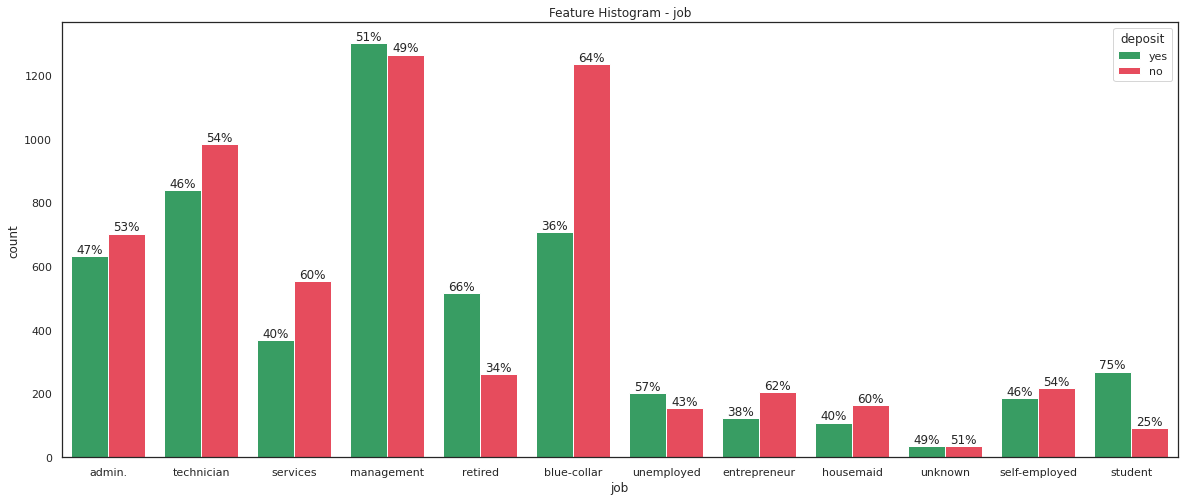

In [47]:
fig, ax = plt.subplots(figsize=(20,8))
data_visualization.plot_histogram("job")

**Age vs Job status**
Age and job are highly corrolated

Text(0.5, 1.0, 'Age vs Occupation')

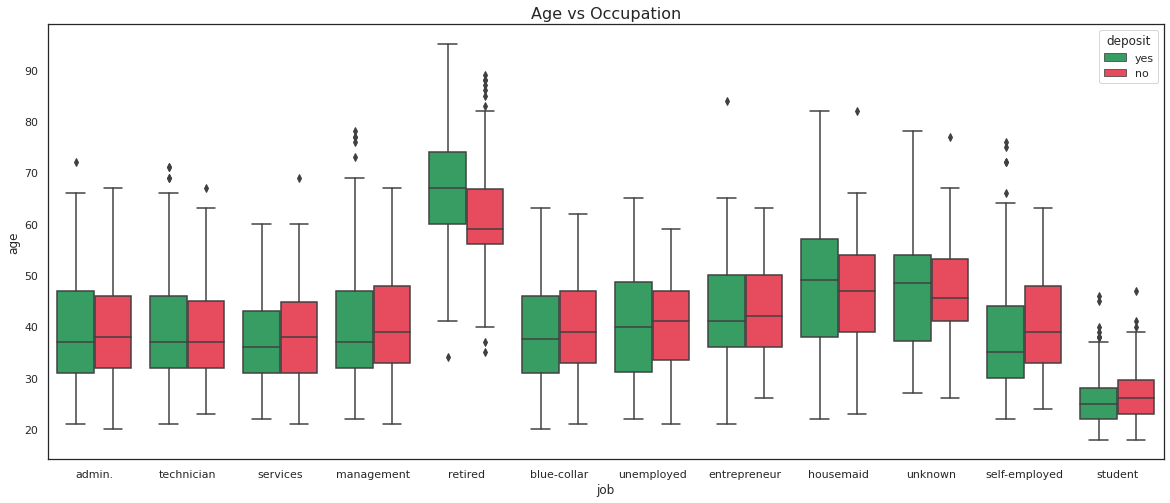

In [48]:
ax = plt.figure(figsize=(20,8))
ax = sns.boxplot(x="job", y="age", hue="deposit",
                  data=dataset, palette=colors)
plt.title("Age vs Occupation", fontsize=16)

**Loan**

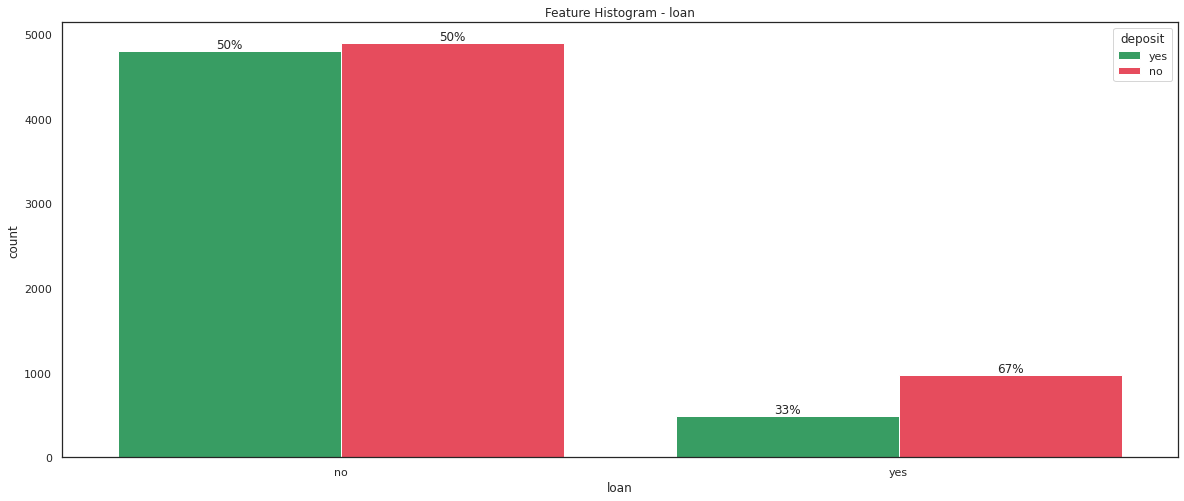

In [50]:
fig, ax = plt.subplots(figsize=(20,8))
data_visualization.plot_histogram('loan')

**Balance**

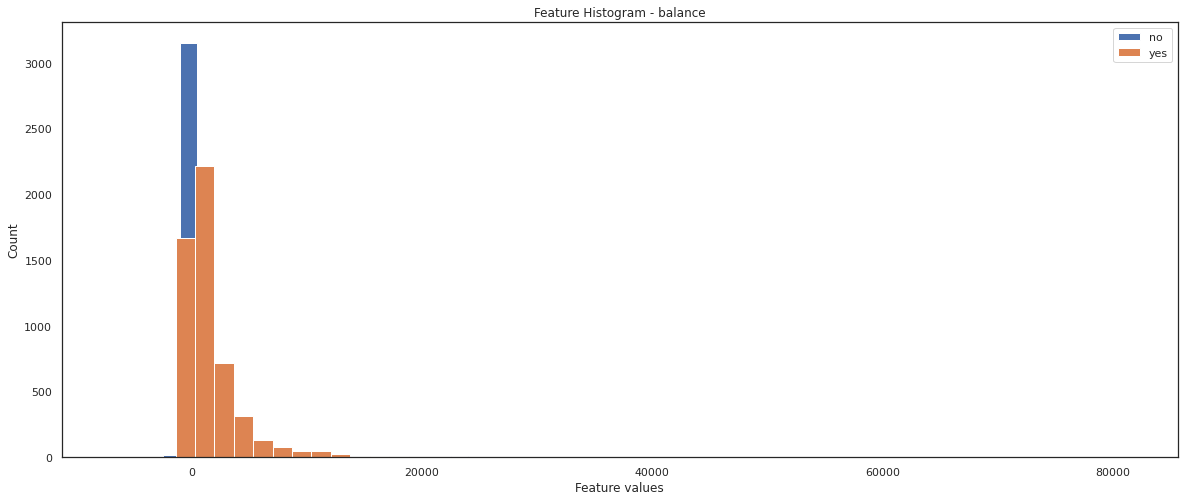

In [52]:

data_visualization.histogram_numerical('balance',50)

In [60]:
#create categories

dataset['balance_categories'] = np.nan

l = [dataset]

for col in l:
    col.loc[col['balance'] <= 0, 'balance_categories'] = 'no balance'
    col.loc[(col['balance'] > 0) & (col['balance'] <= 1000), 'balance_categories'] = 'low balance'
    col.loc[(col['balance'] > 1000) & (col['balance'] <= 5000), 'balance_categories'] = 'average balance'
    col.loc[col['balance'] > 5000, 'balance_categories'] = 'high balance'
    

In [ ]:
data_visualization=data_visualization(dataset)

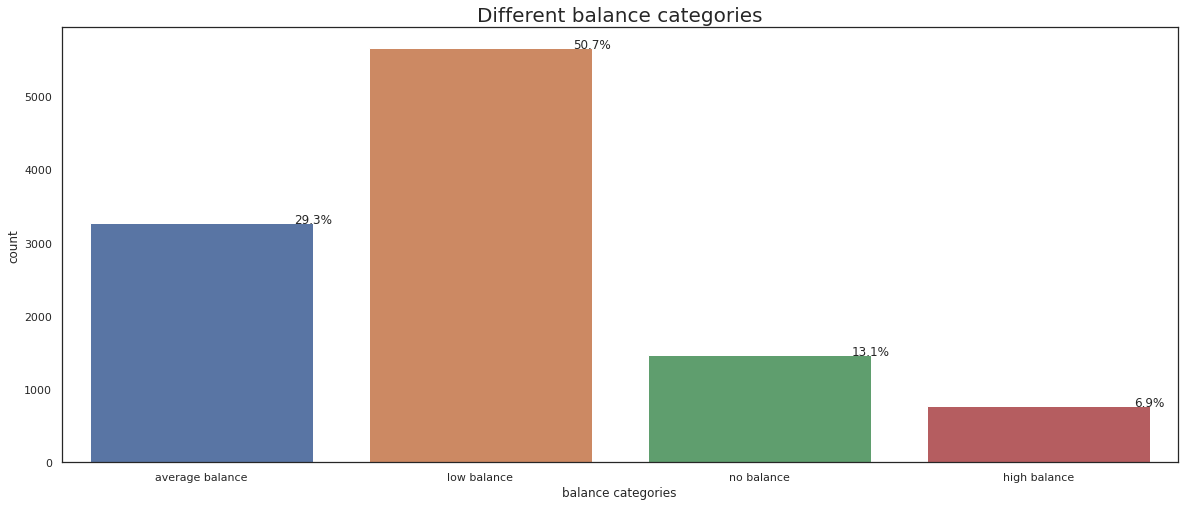

In [61]:
data_visualization.plot_categories("balance_categories","balance")

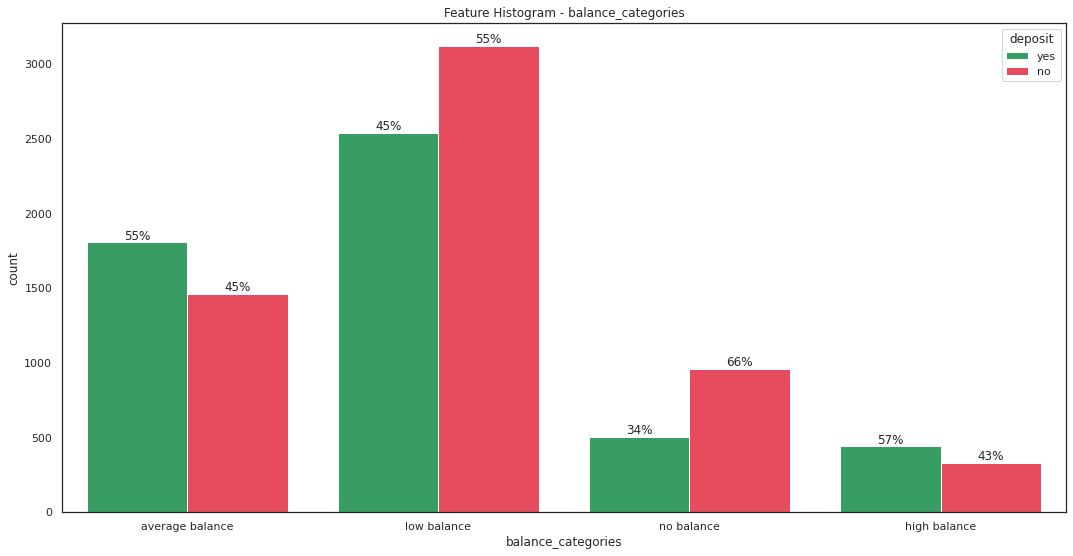

In [63]:
f2,ax2=plt.subplots(1,1,figsize=(18,9))
data_visualization.plot_histogram('balance_categories')

**housing**

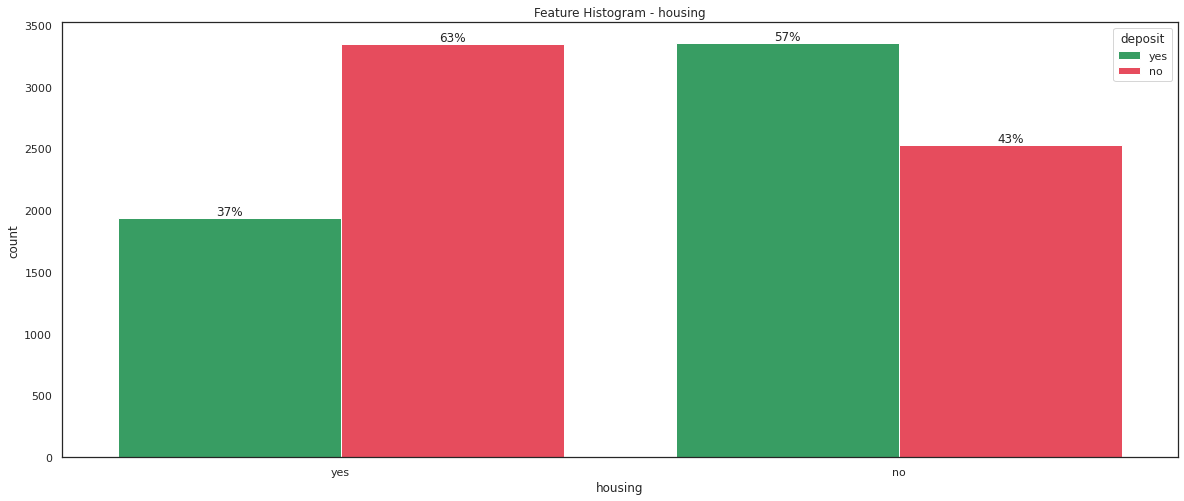

In [53]:
fig, ax = plt.subplots(figsize=(20,8))
data_visualization.plot_histogram('housing')

**Default**

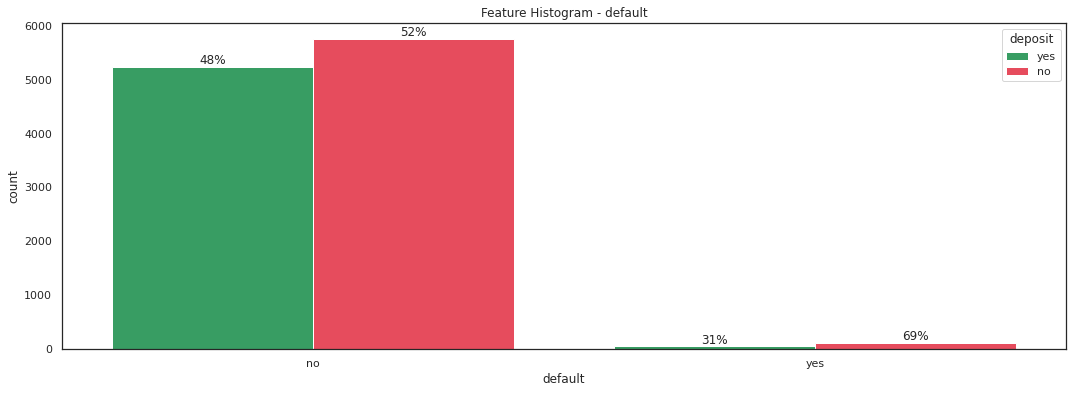

In [65]:
fig, ax = plt.subplots(figsize=(18,6))
data_visualization.plot_histogram('default')

**Marital**

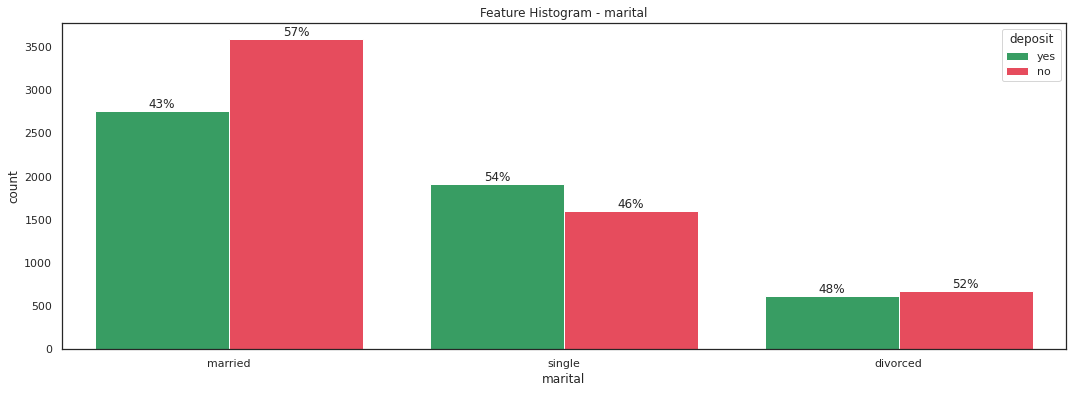

In [68]:
fig, ax = plt.subplots(figsize=(18,6))
data_visualization.plot_histogram('marital')

**Education**

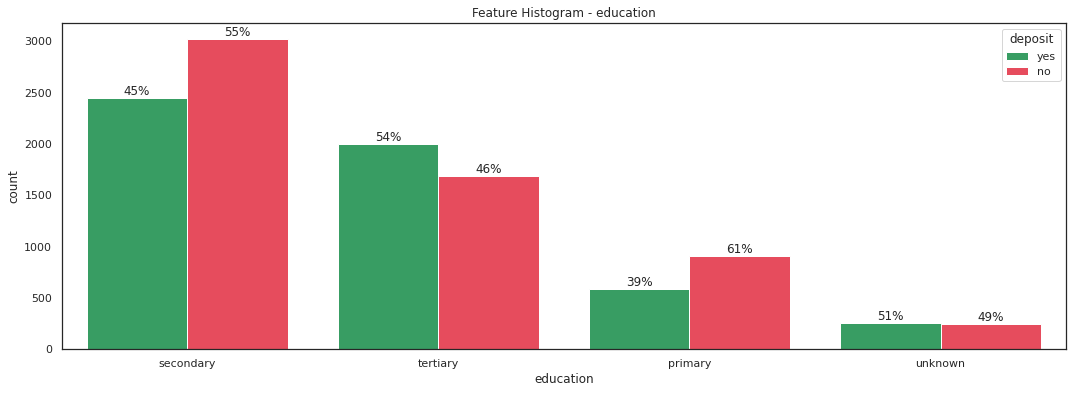

In [69]:
fig, ax = plt.subplots(figsize=(18,6))
data_visualization.plot_histogram('education')

**Campaign related factors**

**pdays**

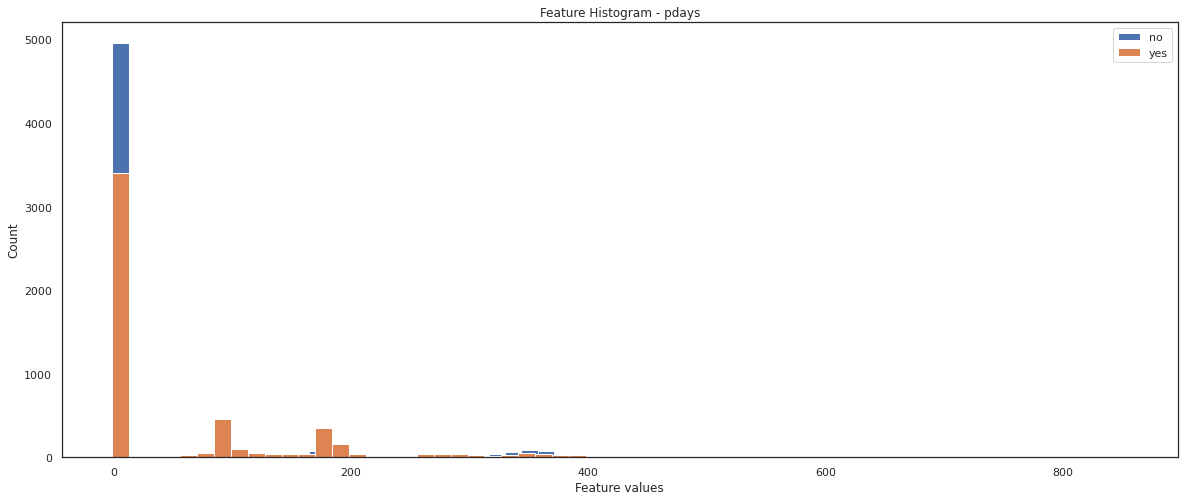

In [70]:
data_visualization.histogram_numerical("pdays",60)

**poutcome**

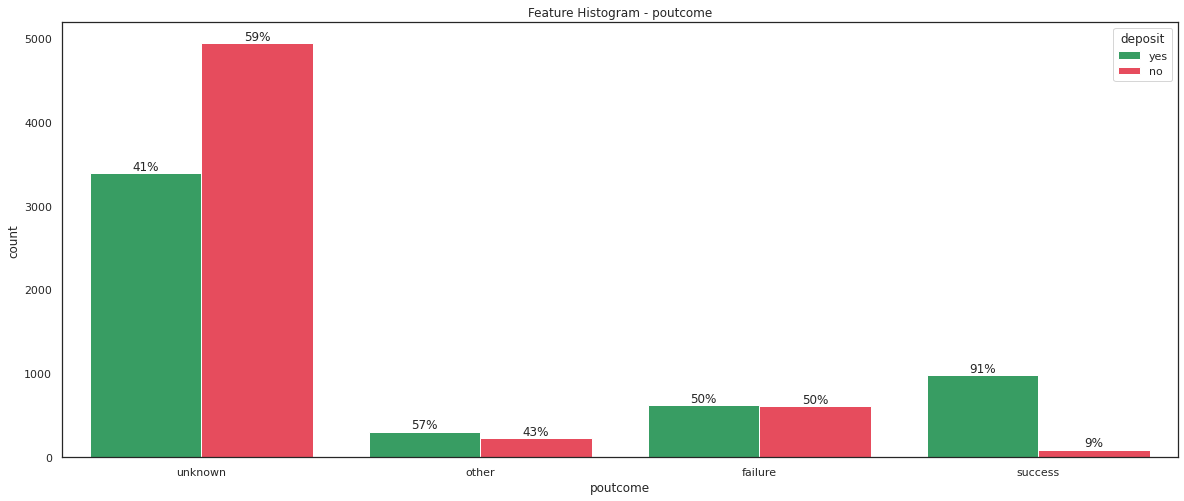

In [72]:
fig, ax = plt.subplots(figsize=(20,8))
data_visualization.plot_histogram("poutcome")

**contact**

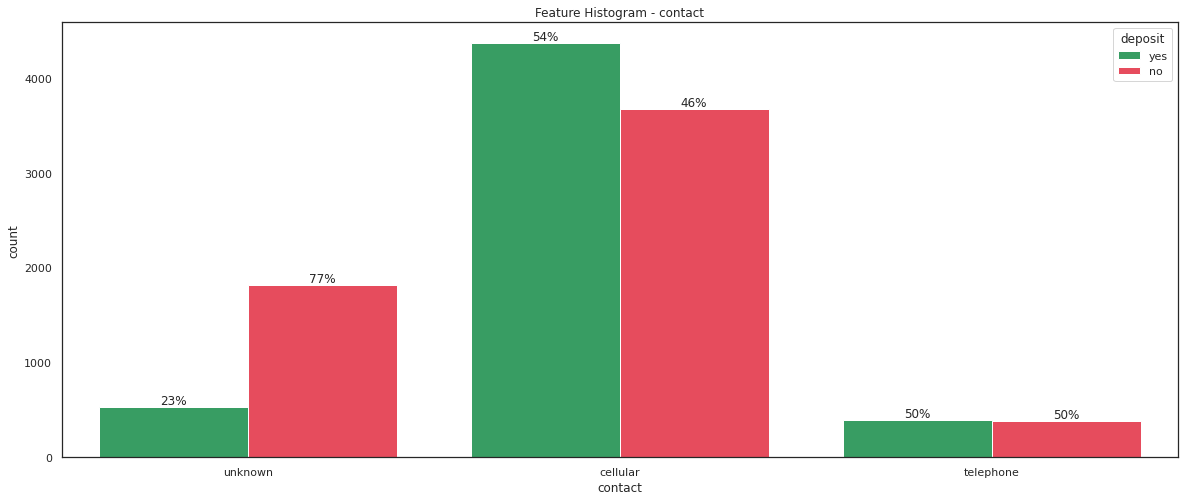

In [73]:
fig, ax = plt.subplots(figsize=(20,8))
data_visualization.plot_histogram("contact")

**previous**

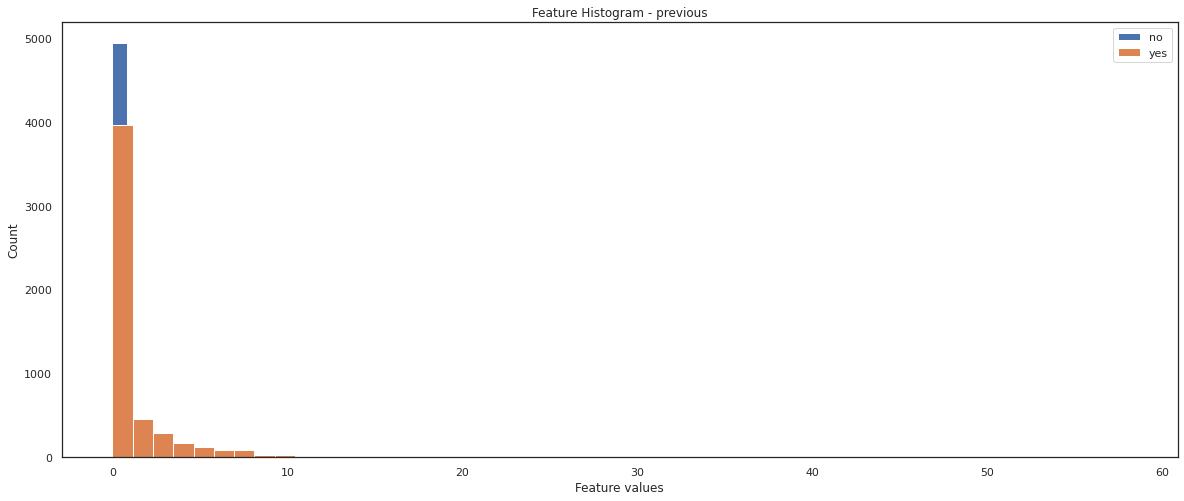

In [77]:

data_visualization.histogram_numerical("previous",50)

**day**

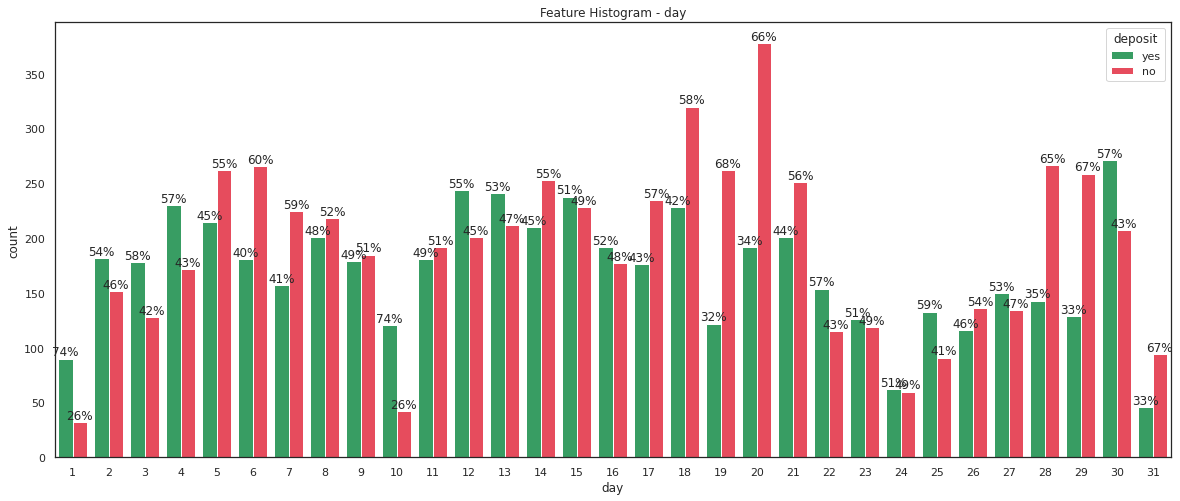

In [78]:
fig, ax = plt.subplots(figsize=(20,8))
data_visualization.plot_histogram("day")

**Duration**

In [79]:
# convert from seconds to minutes
dataset['duration'] = dataset['duration']/60

In [83]:
data_visualization=data_visualization(dataset)

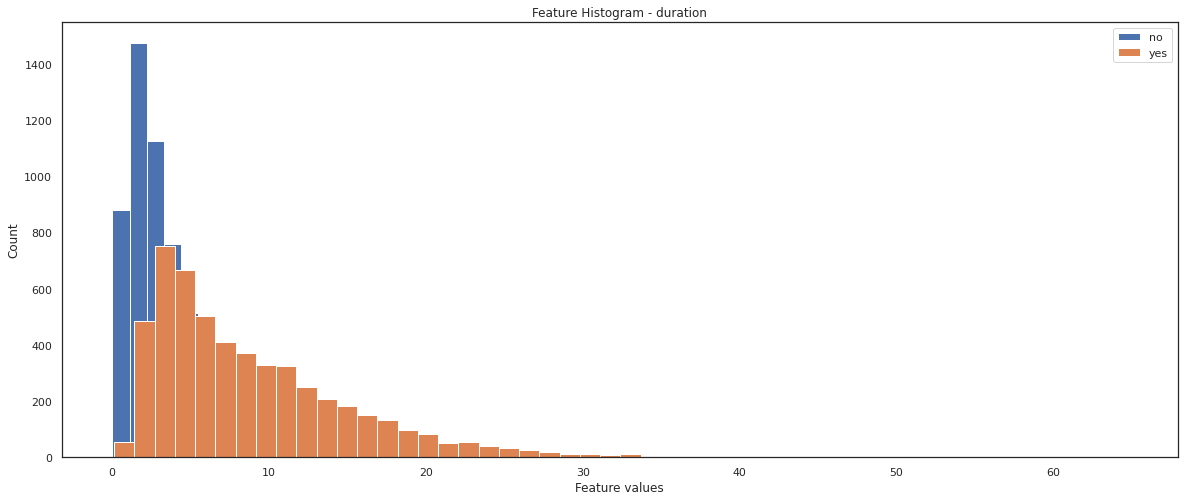

In [84]:
data_visualization.histogram_numerical('duration',50)

**campaign**

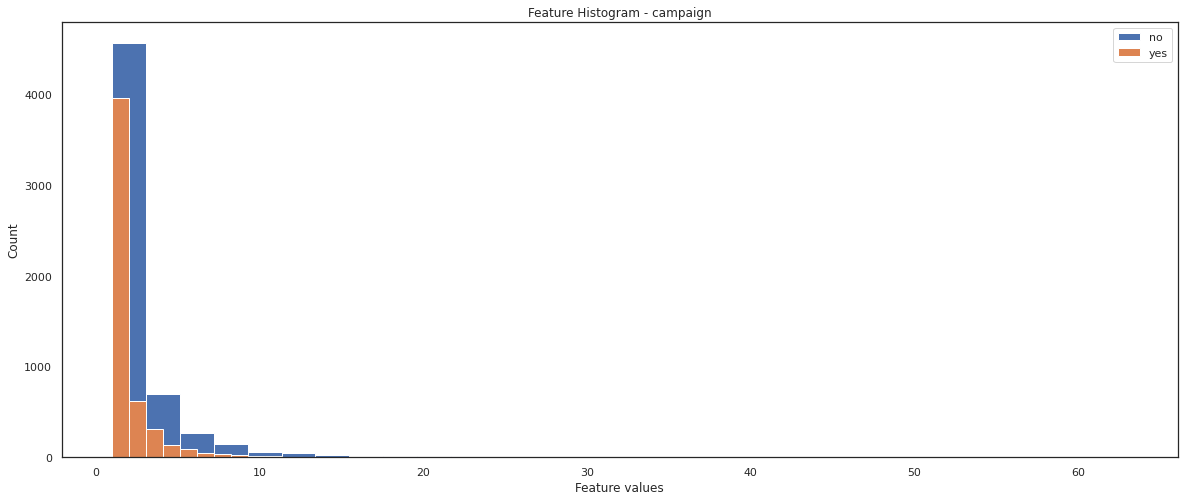

In [86]:

data_visualization.histogram_numerical('campaign',30)

**campaign and duration**

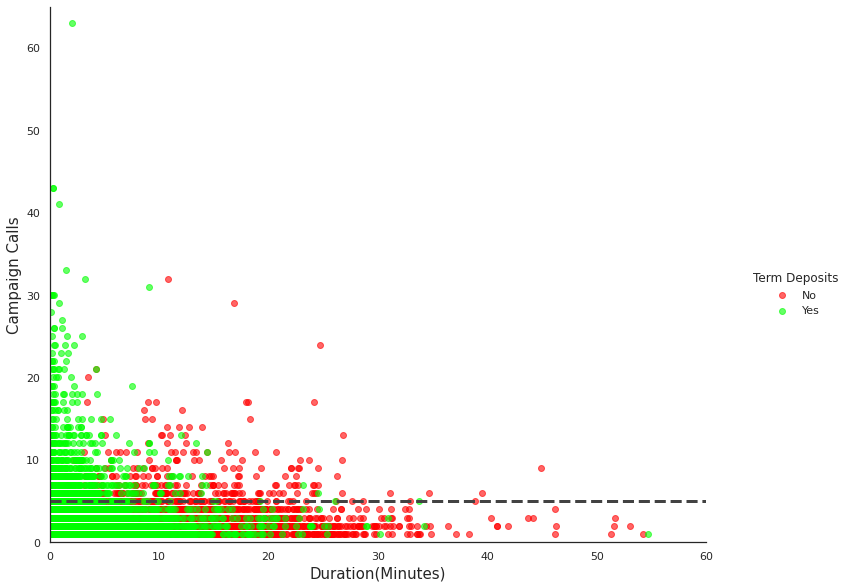

In [95]:
colors2=['#FF0000','#00FF00']
g1 = sns.lmplot(x='duration', y='campaign', data=dataset,
           fit_reg=False, # No regression line
           hue='deposit',
        palette = colors2,
        scatter_kws={'alpha':0.6}
          ) 

g1.fig.set_size_inches(13,9)
# title
new_title = 'Term Deposits'
g1._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g1._legend.texts, new_labels): t.set_text(l)

plt.axis([0,60,0,65])
plt.axhline(y=5, linewidth=3, color="#424242", linestyle='--')
plt.xlabel('Duration(Minutes)', fontsize=15)
plt.ylabel('Campaign Calls', fontsize=15)

plt.show()

In [96]:
#calculate success rate
success_rate = pd.crosstab(dataset['deposit'], dataset['campaign']).apply(lambda x: x/x.sum() * 100)
success_rate


campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,41,43,63
deposit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,46.623593,53.731836,53.21726,58.884565,63.227513,65.283019,66.18705,75.0,70.833333,73.076923,60.0,86.206897,80.0,73.333333,69.230769,77.777778,57.142857,100.0,100.0,80.0,87.5,100.0,100.0,80.0,100.0,100.0,100.0,100.0,50.0,100.0,100.0,50.0,100.0,100.0,100.0,100.0
yes,53.376407,46.268164,46.78274,41.115435,36.772487,34.716981,33.81295,25.0,29.166667,26.923077,40.0,13.793103,20.0,26.666667,30.769231,22.222222,42.857143,0.0,0.0,20.0,12.5,0.0,0.0,20.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0


In [99]:
#create table to plot 

import plotly.figure_factory as FF

onecall_no =round(success_rate.at['no',1], 2) 
onecall= round(success_rate.at['yes',1],2)
twocalls_no = round(success_rate.at['no',2],2)
twocalls = round(success_rate.at['yes',2],2)
threecalls_no = round(success_rate.at['no',3],2)
threecalls = round(success_rate.at['yes',3],2)
fourcalls_no = round(success_rate.at['no',4],2)
fourcalls = round(success_rate.at['yes',4],2)
fivecalls_no = round(success_rate.at['no',5],2)
fivecalls = round(success_rate.at['yes',5],2)
fivecalls_no = round(success_rate.at['no',5],2)
fivecalls= round(success_rate.at['yes',5],2)
sixcalls_no= round(success_rate.at['no',6],2)
sixcalls= round(success_rate.at['yes',6],2)
sevencalls_no = round(success_rate.at['no',7],2)
sevencalls= round(success_rate.at['yes',7],2)


# Add table data
table = [['Number of <br> Calls', 'No', 'Yes'],
              ['One Call', onecall_no , onecall],
              ['Two Calls', twocalls_no , twocalls],
              ['Three Calls', threecalls_no, threecalls],
              ['Four Calls', fourcalls_no, fourcalls],
              ['Five Calls', fivecalls_no, fivecalls],
              ['six Calls', sixcalls_no, sixcalls],
              ['seven Calls', sevencalls_no, sevencalls],
]

figure = FF.create_table(table, height_constant=60)
figure

**Month**

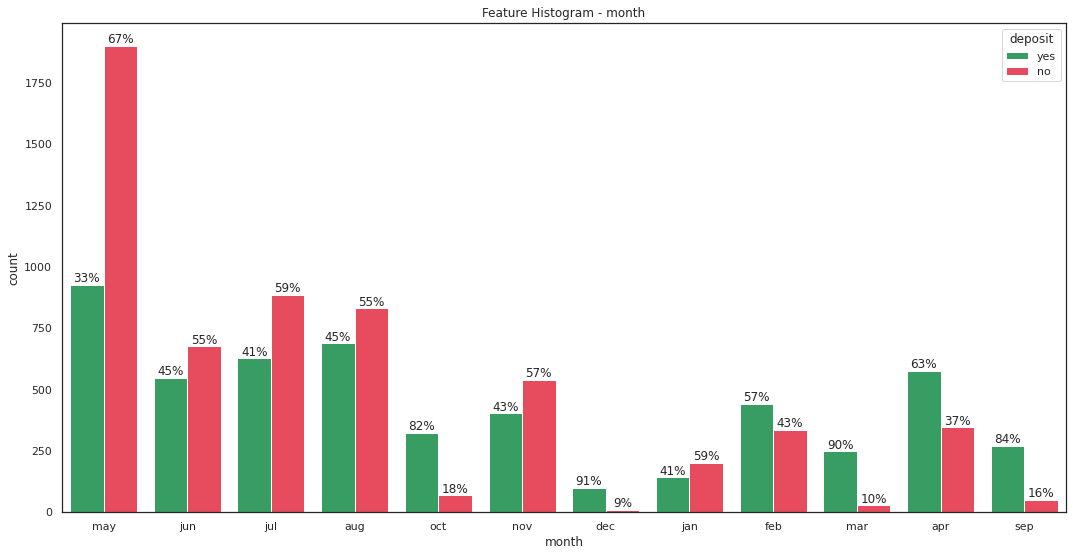

In [101]:
f2,ax2=plt.subplots(1,1,figsize=(18,9))
data_visualization.plot_histogram('month')